## Auto ARIMA sample 
### code source : https://www.analyticsvidhya.com/blog/2018/08/auto-arima-time-series-modeling-python-r/
### source - PMDArima - http://alkaline-ml.com/pmdarima/quickstart.html#quickstart

In [1]:
import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
#pyramid-arima has been deprecated for years. Use pip install pmdarima   
#from pyramid.arima import auto_arima

import pmdarima as pmd

In [2]:
#load dataset
passenger_data =pd.read_csv('..\data\passengers\international-airline-passengers.csv',sep=';')

In [3]:
passenger_data.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [4]:
#divide data into train and validation set
train_dataset = passenger_data[:int(0.7*(len(passenger_data)))]
valid_dataset = passenger_data[int(0.7*(len(passenger_data))):]



In [5]:
#preprocessing - as ARIMA requires univariate series as input
train_dataset.drop('Month', axis=1, inplace=True)
valid_dataset.drop('Month', axis=1, inplace=True)


C:\Users\henci\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


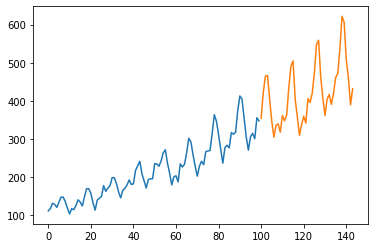

In [6]:
#plotting the data
train_dataset['Passengers'].plot()
valid_dataset['Passengers'].plot()

In [7]:
#building the model
arima_model = pmd.auto_arima(y=train_dataset, trace=True, error_action='ignore',suppress_warnings=True)

#important parameters 
#start_p=1, start_q=1, 
#max_p=3, max_q=3, m=12,
#start_P=0, seasonal=True,
#d=1, D=1, trace=True,
#error_action='ignore',  # don't want to know if an order does not work
#suppress_warnings=True,  # don't want convergence warnings
#stepwise=True
                        
arima_model.fit(train_dataset)

Performing stepwise search to minimize aic
Fit ARIMA(2,1,2)x(0,0,0,0) [intercept=True]; AIC=886.147, BIC=901.718, Time=0.312 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=True]; AIC=909.769, BIC=914.959, Time=0.008 seconds
Fit ARIMA(1,1,0)x(0,0,0,0) [intercept=True]; AIC=907.370, BIC=915.155, Time=0.040 seconds
Fit ARIMA(0,1,1)x(0,0,0,0) [intercept=True]; AIC=904.979, BIC=912.764, Time=0.046 seconds
Fit ARIMA(0,1,0)x(0,0,0,0) [intercept=False]; AIC=908.785, BIC=911.380, Time=0.006 seconds
Fit ARIMA(1,1,2)x(0,0,0,0) [intercept=True]; AIC=884.966, BIC=897.942, Time=0.142 seconds
Near non-invertible roots for order (1, 1, 2)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(2,1,1)x(0,0,0,0) [intercept=True]; AIC=884.152, BIC=897.128, Time=0.189 seconds
Near non-invertible roots for order (2, 1, 1)(0, 0, 0, 0); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA(

ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 3), out_of_sample_size=0,
      scoring='mse', scoring_args=None, seasonal_order=(0, 0, 0, 0),
      start_params=None, suppress_warnings=True, trend=None,
      with_intercept=True)

In [8]:
#print summary
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:               SARIMAX(3, 1, 3)   Log Likelihood                -428.791
Date:                Sun, 12 Jul 2020   AIC                            873.583
Time:                        22:04:20   BIC                            894.344
Sample:                             0   HQIC                           881.982
                                - 100                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.9964      0.359      2.778      0.005       0.293       1.700
ar.L1          0.8181      0.100      8.161      0.000       0.622       1.015
ar.L2          0.4024      0.139      2.890      0.004       0.130       0.675
ar.L3         -0.6726      0.088     -7.640      0.000      -0.845      -0.500
ma.L1         -0.8148      5.402     -0.151      0.880     -11.403       9.773
ma.L2         -0.9201      9.804     -0.094      0.925     -20.135      18.295
ma.L3          0.8943      4.833      0.185      0.853      -8.579      10.367
sigma2       319.8175   1719.672      0.186      0.852   -3050.678    3690.313
===================================================================================
Ljung-Box (Q):                      165.84   Jarque-Bera (JB):                 3.49
Prob(Q):                              0.00   Prob(JB):                         0.17
Heteroskedasticity (H):               3.40   Skew:                             0.43
Prob(H) (two-sided):                  0.00   Kurtosis:                         2.67
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [9]:
predicted_result = arima_model.predict(n_periods=len(valid_dataset))


In [10]:
#convert to dataframe
predicted_result = pd.DataFrame(predicted_result, index=valid_dataset.index, columns=['Prediction'])

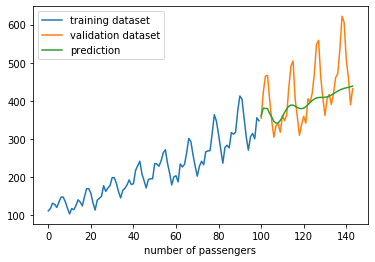

In [14]:
#plot the predicted result 
plt.plot(train_dataset, label='training dataset')
plt.plot(valid_dataset, label='validation dataset')
plt.plot(predicted_result, label='prediction')
plt.legend()
plt.show()